# Q2


## Data

In [73]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('claim_data_group5_2024.csv')
frequency_data = data['ClaimNb']
severity_data = data['ClaimAmount']


## Fit Frequency Distribution

Here we estimated the dispersion parameter Alpha, which is 1.0646657571623466, it shows there's a high tendency of dispersion but the alphais around 1 shows the distpersion is not extremely high. And the probality of success is 1.0 means it follows a poisson distribution.

Estimated frequency distribution parameter (lambda): 0.03902


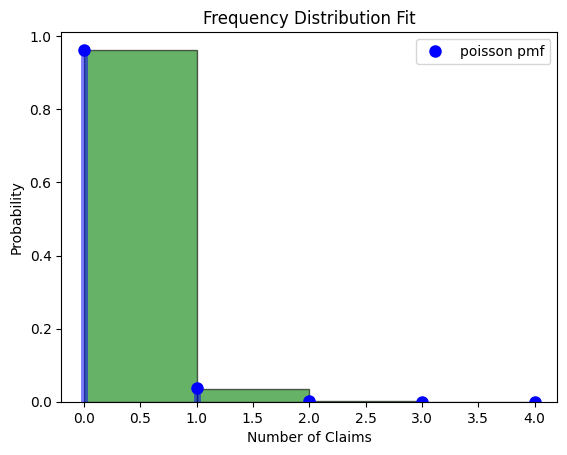

In [74]:
# Estimate frequency distribution parameters (Poisson distribution)
frequency_mean = np.mean(frequency_data)
frequency_dist = stats.poisson(mu=frequency_mean)

print(f"Estimated frequency distribution parameter (lambda): {frequency_mean}")
plt.hist(frequency_data, bins=range(int(min(frequency_data)), int(max(frequency_data)) + 1), density=True, alpha=0.6, color='g', edgecolor='black')
x = np.arange(int(min(frequency_data)), int(max(frequency_data)) + 1)
plt.plot(x, frequency_dist.pmf(x), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, frequency_dist.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.title('Frequency Distribution Fit')
plt.legend()
plt.show()


In [75]:

severity_data = data['ClaimAmount']
if (severity_data <= 0).any():
    print("Data contains zero or negative values. Filtering out these values for gamma fit.")
    severity_data = severity_data[severity_data > 0]  # Keep only positive values
alpha_sev, loc_sev, beta_sev = stats.gamma.fit(severity_data, floc=0)
print("Estimated Gamma parameters for severity distribution:")
print("Alpha (shape):", alpha_sev)
print("Location (loc):", loc_sev)
print("Beta (scale):", beta_sev)


Data contains zero or negative values. Filtering out these values for gamma fit.
Estimated Gamma parameters for severity distribution:
Alpha (shape): 0.77598083307877
Location (loc): 0
Beta (scale): 2693.4142535413143


In the claims frequency distribution plot: the data distribution is very skewed towards zero, indicating that most policies have no claims during the observation period. The blue points in the plot represent the probability mass function (PMF) fit of the Poisson distribution. The fit to the Poisson distribution is generally consistent with the data, but the Poisson distribution is not very good due to the fact that the distribution of the data is highly skewed towards zero.The Gamma distribution fit indicates that most claims are of low severity, but there are some extreme high claim events. This distributional characteristic is common in insurance claims and suggests the need to be financially prepared for the occasional high claim.

 ## Simulated loss （Gamma）
 

According to the simulation, the average total expected loss in a year would be 2000.56 with a standard deviation of 3676.91, indicating a high degree of volatility in the total loss.

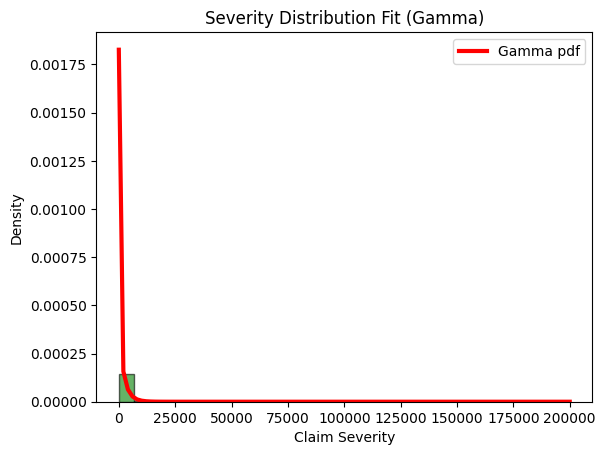

In [76]:
# Plot the histogram of claim severity data to visualize the distribution
plt.hist(severity_data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

x = np.linspace(min(severity_data), max(severity_data), 100)
plt.plot(x, stats.gamma.pdf(x, alpha_sev, loc=loc_sev, scale=beta_sev), 'r-', lw=3, label='Gamma pdf')

plt.xlabel('Claim Severity')
plt.ylabel('Density')
plt.title('Severity Distribution Fit (Gamma)')
plt.legend()
plt.show()


 ## Simulated loss (log-normal)
 

Estimated Log-normal parameters for severity distribution:
Shape: 1.1596764669034225
Location: 0
Scale: 969.7229460522528


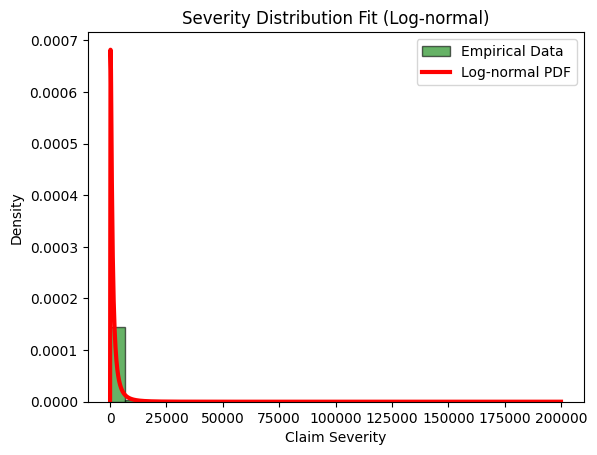

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

shape_lognorm, loc_lognorm, scale_lognorm = stats.lognorm.fit(severity_data, floc=0)

print("Estimated Log-normal parameters for severity distribution:")
print("Shape:", shape_lognorm)
print("Location:", loc_lognorm)
print("Scale:", scale_lognorm)

plt.hist(severity_data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label="Empirical Data")
x = np.linspace(min(severity_data), max(severity_data), 1000)
lognorm_pdf = stats.lognorm.pdf(x, shape_lognorm, loc=loc_lognorm, scale=scale_lognorm)

# Plot 
plt.plot(x, lognorm_pdf, 'r-', lw=3, label="Log-normal PDF")
plt.xlabel("Claim Severity")
plt.ylabel("Density")
plt.title("Severity Distribution Fit (Log-normal)")
plt.legend()
plt.show()


## KS TEST FOR Gamma and Log-normal

In [78]:
# KS Test for both Gamma and Log-normal distributions
ks_stat_gamma, p_value_gamma = stats.kstest(severity_data, 'gamma', args=(alpha_sev, loc_sev, beta_sev))
ks_stat_lognorm, p_value_lognorm = stats.kstest(severity_data, 'lognorm', args=(shape_lognorm, loc_lognorm, scale_lognorm))

print("KS Test for Gamma Distribution - Statistic:", ks_stat_gamma, "P-value:", p_value_gamma)
print("KS Test for Log-normal Distribution - Statistic:", ks_stat_lognorm, "P-value:", p_value_lognorm)

# Determine the best fit distribution
if p_value_lognorm > p_value_gamma:
    best_fit_dist = 'lognorm'
    best_fit_params = (shape_lognorm, loc_lognorm, scale_lognorm)
else:
    best_fit_dist = 'gamma'
    best_fit_params = (alpha_sev, loc_sev, beta_sev)

print(f"Best fit distribution: {best_fit_dist} with parameters: {best_fit_params}")


KS Test for Gamma Distribution - Statistic: 0.24645803383389342 P-value: 1.5089949709438602e-196
KS Test for Log-normal Distribution - Statistic: 0.2307185397172155 P-value: 5.315203177357836e-172
Best fit distribution: lognorm with parameters: (1.1596764669034225, 0, 969.7229460522528)


The red Gamma Distribution Probability Density Function (PDF) curves show that while the distribution of the data is covered over the low amount intervals near zero, the Gamma fit begins to decay rapidly as the claimed amount increases slightly, deviating somewhat from the shape of the distribution of the actual data.

Again, the green histogram represents the actual data distribution for severity. The red Log-normal PDF curve also shows higher densities in the lower amount ranges, which is closer to the actual data distribution.The long-tailed nature of the Log-normal distribution allows it to maintain a certain density in the higher amount ranges, which is more in line with the actual distribution characteristics. Therefore, the Log-normal distribution fits the data better than the Gamma distribution in the long tail.

This can also be seen from the KS-test. The KS-statistic of the Gamma distribution is 0.2465, with a p-value of 1.51e-196, which shows a very small p-value, indicating that the Gamma distribution fits the data poorly, while the KS-statistic of the Log-normal distribution is 0.2307, with a p-value of 5.31e-172, which is still very small, but better than the Gamma distribution. The KS statistic of Log-normal distribution is 0.2307 with a p-value of 5.31e-172, which is still very small but slightly higher than the Gamma distribution. This means that the Log-normal distribution is more in line with the distributional characteristics of the data than the Gamma distribution.


# Monte Carlo Simulation


In [79]:
# Set the number of simulations
num_simulations = 10000
total_losses = []

# Monte Carlo simulation for total losses
for _ in range(num_simulations):
    # Sample the number of claims for the next period using Poisson distribution
    simulated_claims = frequency_dist.rvs()
    
    # Generate claim severity based on the best-fit distribution
    if best_fit_dist == 'lognorm':
        simulated_severity = np.random.lognormal(mean=np.log(scale_lognorm), sigma=shape_lognorm, size=simulated_claims)
    else:
        simulated_severity = np.random.gamma(alpha_sev, beta_sev, simulated_claims)
    
    # Calculate total loss for this simulation
    total_loss = simulated_severity.sum()
    total_losses.append(total_loss)

# Convert to numpy array
total_losses = np.array(total_losses)


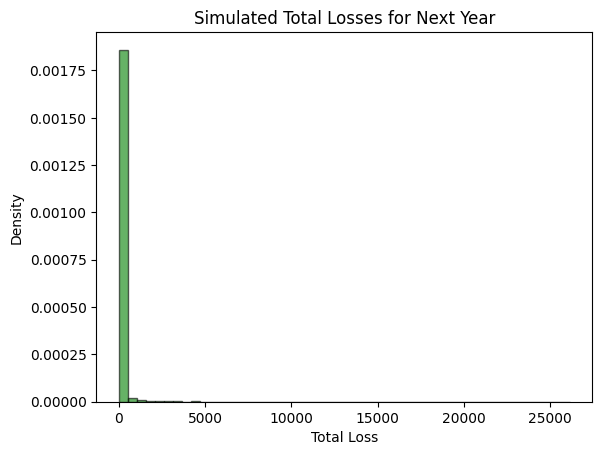

Simulated Total Losses - Mean: 69.01416734487299
Simulated Total Losses - Std Dev: 641.0860536793535


In [80]:
# Plot the simulated total losses distribution
plt.hist(total_losses, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Simulated Total Losses for Next Year')
plt.xlabel('Total Loss')
plt.ylabel('Density')
plt.show()

# Print summary statistics
print("Simulated Total Losses - Mean:", total_losses.mean())
print("Simulated Total Losses - Std Dev:", total_losses.std())


Based on the results of the Monte Carlo simulation, we find that the mean value of the simulated total losses is about 79. This means that the average value of the total losses for the coming year over the course of several simulations is 79. This is a very low value, suggesting that in the majority of the simulated scenarios, the total losses are not expected to be high. 

The standard deviation of the simulated total losses is about 766. The relatively high standard deviation indicates that while most of the simulations were close to zero, there were occasional cases of extreme high losses. Such high standard deviations are usually indicative of a long-tailed nature of the distribution, i.e., very large total losses may occasionally occur.

There is a small amount of density in the figure in the region of extreme high losses, but the concentration is very low, which usually indicates that the distribution has long-tailed properties. That is, there are a few simulations that show high losses even though the total losses are low in most cases.

